## Satisfaction Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression


In [17]:
#load dataset
df= pd.read_csv(r"C:\Users\hp\Downloads\Data-20241219T180034Z-001\Data\Copy of Week2_challenge_data_source(CSV).csv")
df_task4 = df.copy()

# Handling Missing Values (Fill with mean)
df['Total UL (Bytes)'] = df['Total UL (Bytes)'].fillna(df['Total UL (Bytes)'].mean())
df['Total DL (Bytes)'] = df['Total DL (Bytes)'].fillna(df['Total DL (Bytes)'].mean())

# Scaling the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Total UL (Bytes)', 'Total DL (Bytes)']])

# Fit K-means clustering (assume k=3 from Task 3.4)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Calculate engagement and experience scores
less_engaged_cluster_center = kmeans.cluster_centers_[0]  # Assuming cluster 0 is less engaged
worst_experience_cluster_center = kmeans.cluster_centers_[1]  # Assuming cluster 1 is worst experience

# Scale user data points
scaled_user_data = scaler.transform(df[['Total UL (Bytes)', 'Total DL (Bytes)']])

# Engagement score
df['engagement_score'] = euclidean_distances(
    scaled_user_data, 
    [less_engaged_cluster_center]
).flatten()

# Experience score
df['experience_score'] = euclidean_distances(
    scaled_user_data, 
    [worst_experience_cluster_center]
).flatten()

# Display a sample of the updated DataFrame
print(df[['Total UL (Bytes)', 'Total DL (Bytes)', 'engagement_score', 'experience_score']].head())





   Total UL (Bytes)  Total DL (Bytes)  engagement_score  experience_score
0        36749741.0       308879636.0          0.755177          1.089120
1        53800391.0       653384965.0          2.451206          1.733071
2        27883638.0       279807335.0          0.452083          1.849055
3        43324218.0       846028530.0          2.265981          2.506688
4        38542814.0       569138589.0          1.124544          1.602688


In [27]:
df_task4 = df.copy()
print(df_task4.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [21]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [29]:

# Satisfaction score as the average of engagement and experience scores
df_task4['satisfaction_score'] = (df_task4['engagement_score'] + df_task4['experience_score']) / 2

# Top 10 satisfied customers
top_10_satisfied = df_task4.nlargest(10, 'satisfaction_score')
print("\nTop 10 Satisfied Customers:")
print(top_10_satisfied[['IMSI', 'satisfaction_score']])


# Features and target variable
features = df_task4[['Total UL (Bytes)', 'Total DL (Bytes)']]
target = df_task4['satisfaction_score']

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Model evaluation
print("\nRegression Model Coefficients:")
print("UL Coefficient:", regressor.coef_[0])
print("DL Coefficient:", regressor.coef_[1])
print("Intercept:", regressor.intercept_)

# Predict and display R-squared value
y_pred = regressor.predict(X_test)

print("R-squared Score:", r2_score(y_test, y_pred))



Top 10 Satisfied Customers:
                IMSI  satisfaction_score
15901   2.082017e+14            4.059684
52132   2.082014e+14            4.031318
142544  2.082018e+14            3.998550
65994   2.082014e+14            3.929243
26109   2.082015e+14            3.901954
136739  2.082015e+14            3.896103
133210  2.082009e+14            3.893240
131771  2.082009e+14            3.875929
142514  2.082015e+14            3.861193
127724  2.082015e+14            3.840159

Regression Model Coefficients:
UL Coefficient: 9.215909300134766e-09
DL Coefficient: 1.3808079959948321e-09
Intercept: 0.615136855058364
R-squared Score: 0.4279381488734946


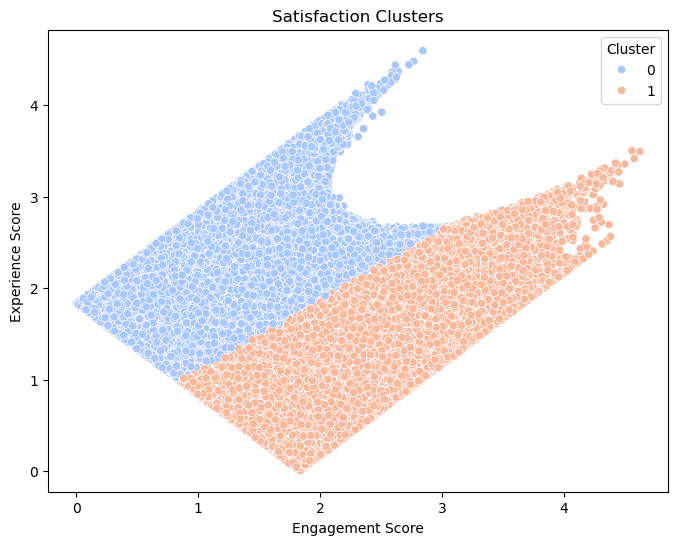


Average Satisfaction & Experience Scores by Cluster:
   satisfaction_cluster  satisfaction_score  experience_score
0                     0            1.677166          2.106556
1                     1            1.564931          1.092909


In [31]:

# Clustering on engagement and experience scores
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df_task4['satisfaction_cluster'] = kmeans_2.fit_predict(df_task4[['engagement_score', 'experience_score']])

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_task4, x='engagement_score', y='experience_score', hue='satisfaction_cluster', palette='coolwarm')
plt.title('Satisfaction Clusters')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend(title='Cluster')
plt.show()


# Aggregate satisfaction and experience scores by cluster
cluster_aggregation = df_task4.groupby('satisfaction_cluster').agg({
    'satisfaction_score': 'mean',
    'experience_score': 'mean'
}).reset_index()

print("\nAverage Satisfaction & Experience Scores by Cluster:")
print(cluster_aggregation)
